Clone the data from the repo

In [23]:
!git clone https://github.com/PhilipMathieu/unet-orthoimagery

fatal: destination path 'unet-orthoimagery' already exists and is not an empty directory.


Imports

In [27]:
import cv2 as cv
from google.colab.patches import cv2_imshow

Read a training image. Note the use of cv.IMREAD_UNCHANGED, which tells OpenCV to read all four channels (not just RGB)

In [76]:
img = cv.imread("/content/unet-orthoimagery/data/Image_Chips_20230408/images/000000000000.tif", cv.IMREAD_UNCHANGED)
print("Image Shape:", img.shape)
print("Image Depth:", img.dtype)

Image Shape: (256, 256, 4)
Image Depth: uint8


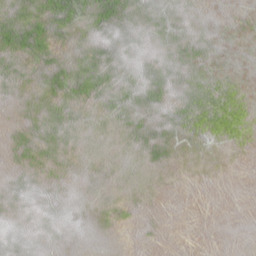

In [78]:
cv2_imshow(img)

Read the training label mask

In [94]:
mask_raw = cv.imread("/content/unet-orthoimagery/data/Image_Chips_20230408/labels/000000000000.tif", cv.IMREAD_UNCHANGED)
print("Image Shape:", mask_raw.shape)
print("Image Depth:", mask_raw.dtype)

Image Shape: (256, 256)
Image Depth: uint16


Note that the image depth is uint16, which seems to cause problems for OpenCV (which "wants" a uint8 image). We can fix this by using convertScaleAbs

In [92]:
mask_scaled = cv.convertScaleAbs(mask_raw)
print("Image Shape:", mask_scaled.shape)
print("Image Depth:", mask_scaled.dtype)

Image Shape: (256, 256)
Image Depth: uint8


Last, to visualize the mask more easily we apply a threshhold.

In [100]:
threshhold, mask = cv.threshold(mask_scaled, 0,255, cv.CV_8U)

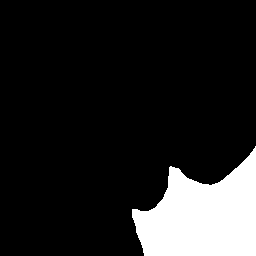

In [102]:
cv2_imshow(mask)